<a href="https://colab.research.google.com/github/rtajeong/M3/blob/main/M3_lab7_dim_reduction_rev1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dimension Reduction

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [53]:
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns

In [ ]:
cancer = load_breast_cancer()
X_all, y = cancer.data, cancer.target

In [ ]:
X_all.shape, y.shape

((569, 30), (569,))

In [ ]:
cancer

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For

In [ ]:
X_all[:2]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02]])

In [ ]:
X_all.dtype

dtype('float64')

In [ ]:
X = StandardScaler().fit_transform(X_all)
X.shape

(569, 30)

In [ ]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
rfc = RandomForestClassifier()
cross_val_score(rfc, X, y, cv=5).mean()

0.9596180717279925

In [ ]:
# let's use just 6 features (20%)

fs = SelectPercentile(percentile=20)   # default score function = ANOVA
X_P = fs.fit_transform(X_all, y)
X_P = StandardScaler().fit_transform(X_P)
fs.get_support()

array([False, False,  True, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True,  True, False, False, False,
        True, False, False])

In [ ]:
fs.scores_, fs.pvalues_

(array([6.46981021e+02, 1.18096059e+02, 6.97235272e+02, 5.73060747e+02,
        8.36511234e+01, 3.13233079e+02, 5.33793126e+02, 8.61676020e+02,
        6.95274435e+01, 9.34592949e-02, 2.68840327e+02, 3.90947023e-02,
        2.53897392e+02, 2.43651586e+02, 2.55796780e+00, 5.32473391e+01,
        3.90144816e+01, 1.13262760e+02, 2.41174067e-02, 3.46827476e+00,
        8.60781707e+02, 1.49596905e+02, 8.97944219e+02, 6.61600206e+02,
        1.22472880e+02, 3.04341063e+02, 4.36691939e+02, 9.64385393e+02,
        1.18860232e+02, 6.64439606e+01]),
 array([8.46594057e-096, 4.05863605e-025, 8.43625104e-101, 4.73456431e-088,
        1.05185036e-018, 3.93826311e-056, 9.96655576e-084, 7.10115016e-116,
        5.73338403e-016, 7.59936804e-001, 9.73894866e-050, 8.43332029e-001,
        1.65190518e-047, 5.89552139e-046, 1.10296609e-001, 9.97599465e-013,
        8.26017617e-010, 3.07230877e-024, 8.76641818e-001, 6.30735508e-002,
        8.48229192e-116, 1.07805749e-030, 5.77139714e-119, 2.82884770e-097

In [ ]:
np.array(fs.scores_).argsort()[::-1]

array([27, 22,  7, 20,  2, 23,  0,  3,  6, 26,  5, 25, 10, 12, 13, 21, 24,
       28,  1, 17,  4,  8, 29, 15, 16, 19, 14,  9, 11, 18])

In [ ]:
cancer.feature_names[fs.get_support()]

array(['mean perimeter', 'mean concave points', 'worst radius',
       'worst perimeter', 'worst area', 'worst concave points'],
      dtype='<U23')

In [ ]:
cross_val_score(rfc, X_P, y).mean()

0.9420431609998448

- the chi-square test measures dependence between stochastic variables, so using this function “weeds out” the features that are the most likely to be independent of class and therefore irrelevant for classification.

In [ ]:
# let's take only 2 features
fs = SelectPercentile(chi2, percentile=6)
X_P = fs.fit_transform(X_all, y)
X_P = StandardScaler().fit_transform(X_P)
cancer.feature_names[fs.get_support()]

array(['mean area', 'worst area'], dtype='<U23')

In [ ]:
fs.get_support()

array([False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False])

In [ ]:
cross_val_score(rfc, X_P, y).mean()

0.9138953578636858

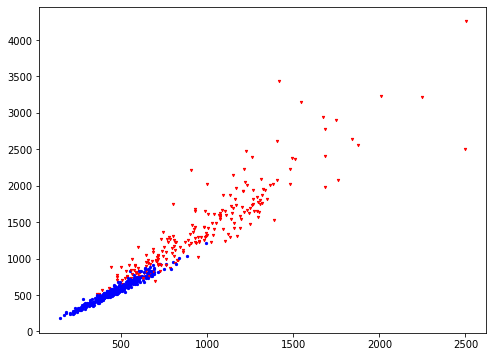

In [ ]:
m = ['v', 'o']
c = ['r', 'b']
plt.figure(figsize=(8,6))
for i in range(len(y)):
  plt.scatter(cancer.data[:,3][i], 
              cancer.data[:,23][i], 
              marker=m[y[i]],
              color=c[y[i]],
              s=5)
plt.show()

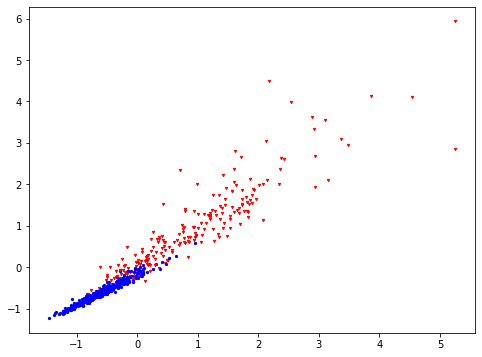

In [ ]:
m = ['v', 'o']
c = ['r', 'b']
plt.figure(figsize=(8,6))
for i in range(len(y)):
  plt.scatter(X_P[:,0][i], 
              X_P[:,1][i], 
              marker=m[y[i]],
              color=c[y[i]],
              s=5)
plt.show()

In [ ]:
# dimension reduction using PCA

pca = PCA(n_components = 2)
pca_result = pca.fit_transform(X)  # X: scaled
pca_result

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

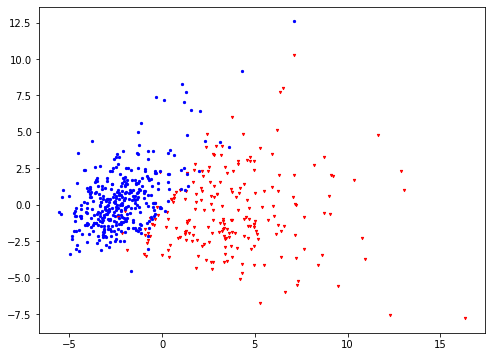

In [ ]:
m = ['v', 'o']
c = ['r', 'b']
plt.figure(figsize=(8,6))
for i in range(len(y)):
  plt.scatter(pca_result[:,0][i], 
              pca_result[:,1][i], 
              marker=m[y[i]],
              color=c[y[i]],
              s=5)
plt.show()

In [ ]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [ ]:
cross_val_score(rfc, pca_result, y, cv=5).mean()



0.9349945660611707

In [ ]:
pca = PCA(n_components = 6)
pca_result = pca.fit_transform(X)  # X: scaled
cross_val_score(rfc, pca_result, y, cv=5).mean()

0.947228691197019

In [ ]:
# one more function - just for viewing

tsne = TSNE(n_components = 2, verbose=1, perplexity=40, n_iter=1000)
tsne_result = tsne.fit_transform(cancer.data)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.002s...
[t-SNE] Computed neighbors for 569 samples in 0.026s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 33.679708
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.379734
[t-SNE] KL divergence after 1000 iterations: 0.218494


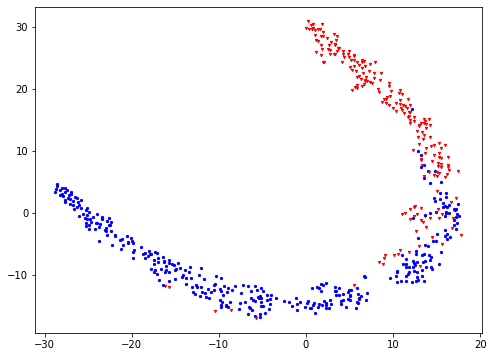

In [ ]:
m = ['v', 'o']
c = ['r', 'b']
plt.figure(figsize=(8,6))
for i in range(len(y)):
  plt.scatter(tsne_result[:,0][i], 
              tsne_result[:,1][i], 
              marker=m[y[i]],
              color=c[y[i]],
              s=5)
plt.show()

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.001s...
[t-SNE] Computed neighbors for 569 samples in 0.035s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 1.522404
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.072411
[t-SNE] KL divergence after 1000 iterations: 0.865152


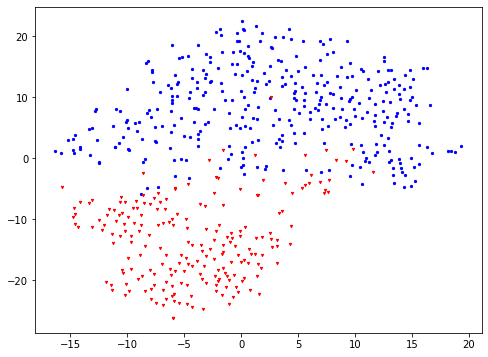

In [ ]:
tsne = TSNE(n_components = 2, verbose=1, perplexity=40, n_iter=1000)
tsne_result = tsne.fit_transform(X)

m = ['v', 'o']
c = ['r', 'b']
plt.figure(figsize=(8,6))
for i in range(len(y)):
  plt.scatter(tsne_result[:,0][i], 
              tsne_result[:,1][i], 
              marker=m[y[i]],
              color=c[y[i]],
              s=5)
plt.show()

In [ ]:
cross_val_score(rfc, tsne_result, y, cv=5).mean()

0.9612948299953423

# Mnist dataset dimension reduction

In [ ]:
from tensorflow.keras.datasets import mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(60000, 784) (10000, 784) (60000,) (10000,)


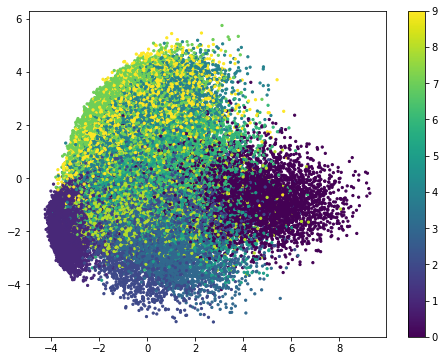

In [ ]:
pca = PCA(n_components = 2)
pca_result = pca.fit_transform(x_train) 

plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=y_train, s=5)
plt.colorbar()
plt.show()

In [ ]:
x_train = x_train[:6000]
y_train = y_train[:6000]

In [ ]:
x_train[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 6000 samples in 0.523s...
[t-SNE] Computed neighbors for 6000 samples in 64.139s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6000
[t-SNE] Computed conditional probabilities for sample 2000 / 6000
[t-SNE] Computed conditional probabilities for sample 3000 / 6000
[t-SNE] Computed conditional probabilities for sample 4000 / 6000
[t-SNE] Computed conditional probabilities for sample 5000 / 6000
[t-SNE] Computed conditional probabilities for sample 6000 / 6000
[t-SNE] Mean sigma: 2.277370
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.425941
[t-SNE] KL divergence after 1000 iterations: 1.492636


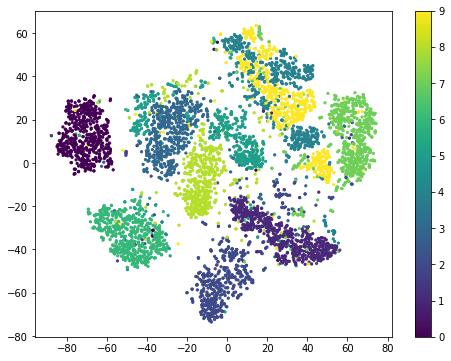

In [ ]:
tsne = TSNE(n_components = 2, verbose=1, perplexity=40, n_iter=1000)
tsne_result = tsne.fit_transform(x_train)

plt.figure(figsize=(8,6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=y_train, s=5)
plt.colorbar()
plt.show()

# For exercise

-  Removing features with low variance

In [ ]:
from sklearn.feature_selection import VarianceThreshold
X = [[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]
np.array(X)

array([[0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 1],
       [0, 1, 0],
       [0, 1, 1]])

In [ ]:
# uppose that we have a dataset with boolean features, and we want to remove all 
# features that are either one or zero (on or off) in more than 80% of the samples.
# sigma(x) = p * (1-p)
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(X)

array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])

- As expected, VarianceThreshold has removed the first column, which has a probability  of containing a zero.